In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [4]:
data = pd.read_csv('housing.csv')

In [ ]:
print(data.info())
print(data.describe())
print(" ")
print(data.isnull().sum())

In [17]:
X = data.drop('median_house_value', axis=1)

X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

X = X.dropna()

In [18]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,True,False,False,False


In [11]:
y =data['median_house_value']
y = y[X.index]

In [ ]:
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
# Print the shapes of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (12259, 12), (12259,)
Validation set: (4087, 12), (4087,)
Test set: (4087, 12), (4087,)


In [22]:
simple_nn = Sequential(
    [
        Input(shape=(12,)),
        Dense(2, activation='relu'),
        Dense(1, activation='linear')
    ]
)

optimizer = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models/simple_nn.keras', save_best_only=True)
simple_nn.compile(optimizer=optimizer, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33019160576.0000 - root_mean_squared_error: 180647.6719 - val_loss: 20437843968.0000 - val_root_mean_squared_error: 142960.9844
Epoch 2/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17650311168.0000 - root_mean_squared_error: 132738.1875 - val_loss: 11550380032.0000 - val_root_mean_squared_error: 107472.6953
Epoch 3/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11627588608.0000 - root_mean_squared_error: 107808.7734 - val_loss: 10914391040.0000 - val_root_mean_squared_error: 104471.9609
Epoch 4/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10845149184.0000 - root_mean_squared_error: 104120.4844 - val_loss: 10705647616.0000 - val_root_mean_squared_error: 103468.1016
Epoch 5/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10970164224.0000 - root_mean_squared_error: 104730.2188 - val_loss: 10506845184.0000 - val_root_mean_squared_error: 102502.9062
Epoch 6/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - 

In [23]:
from tensorflow.keras.models import load_model

In [29]:
simple_nn = load_model('models/simple_nn.keras')
# Below will return RMSE value as squared is false
root_mean_squared_error(simple_nn.predict(X_train), y_train), root_mean_squared_error(simple_nn.predict(X_val), y_val)

384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step


(70155.97106032338, 68217.57026559336)

In [30]:
import matplotlib.pyplot as plt

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\vedes\AppData\Local\Temp\ipykernel_39156\1571501887.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color='red', lw=2)


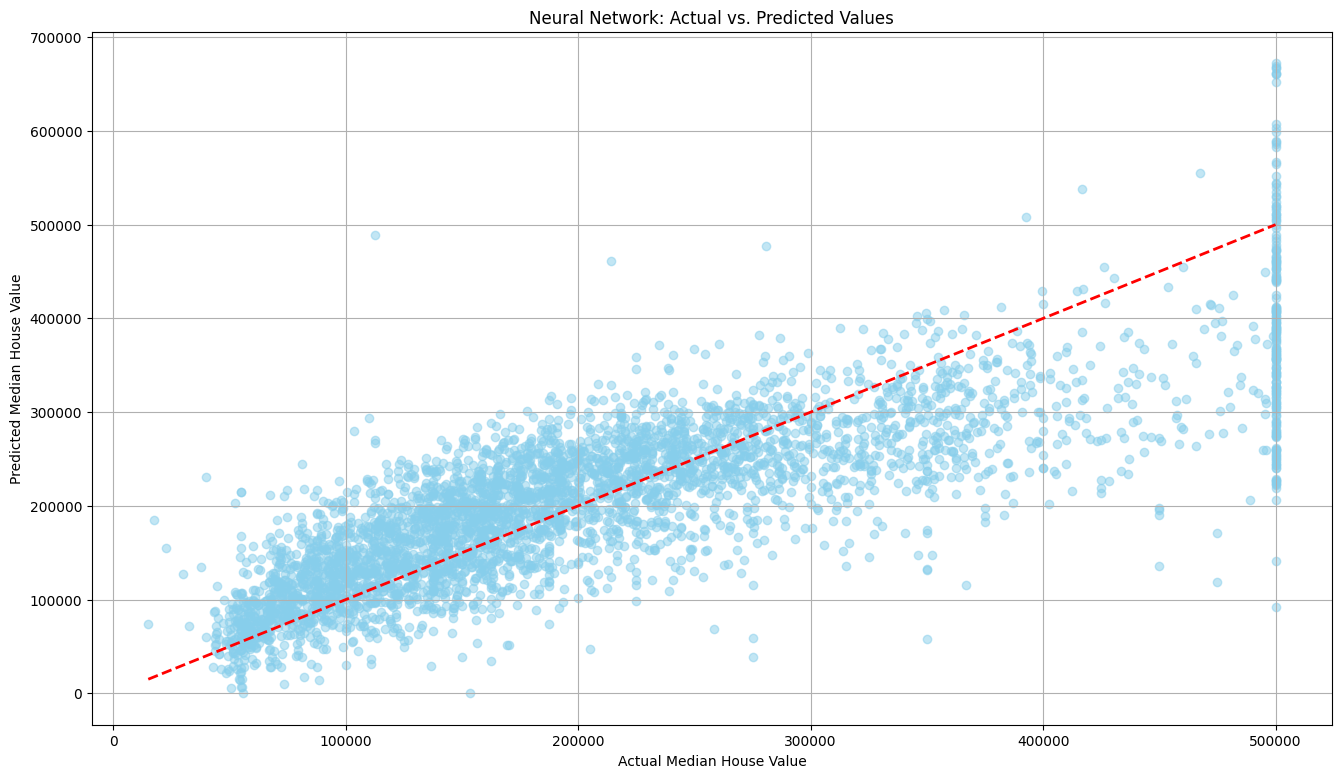

In [32]:
y_val_pred = simple_nn.predict(X_val)

plt.figure(figsize=(16, 9))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='skyblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color='red', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Neural Network: Actual vs. Predicted Values')
plt.grid(True)
plt.show()

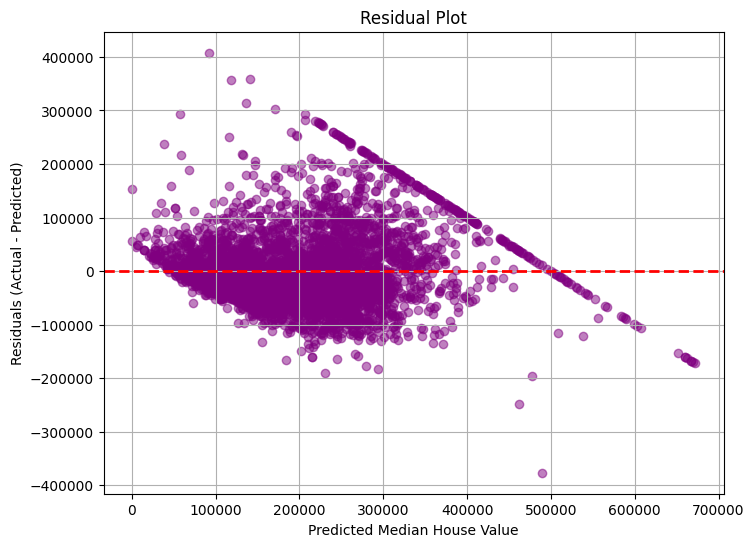

In [33]:
residuals = y_val - y_val_pred.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

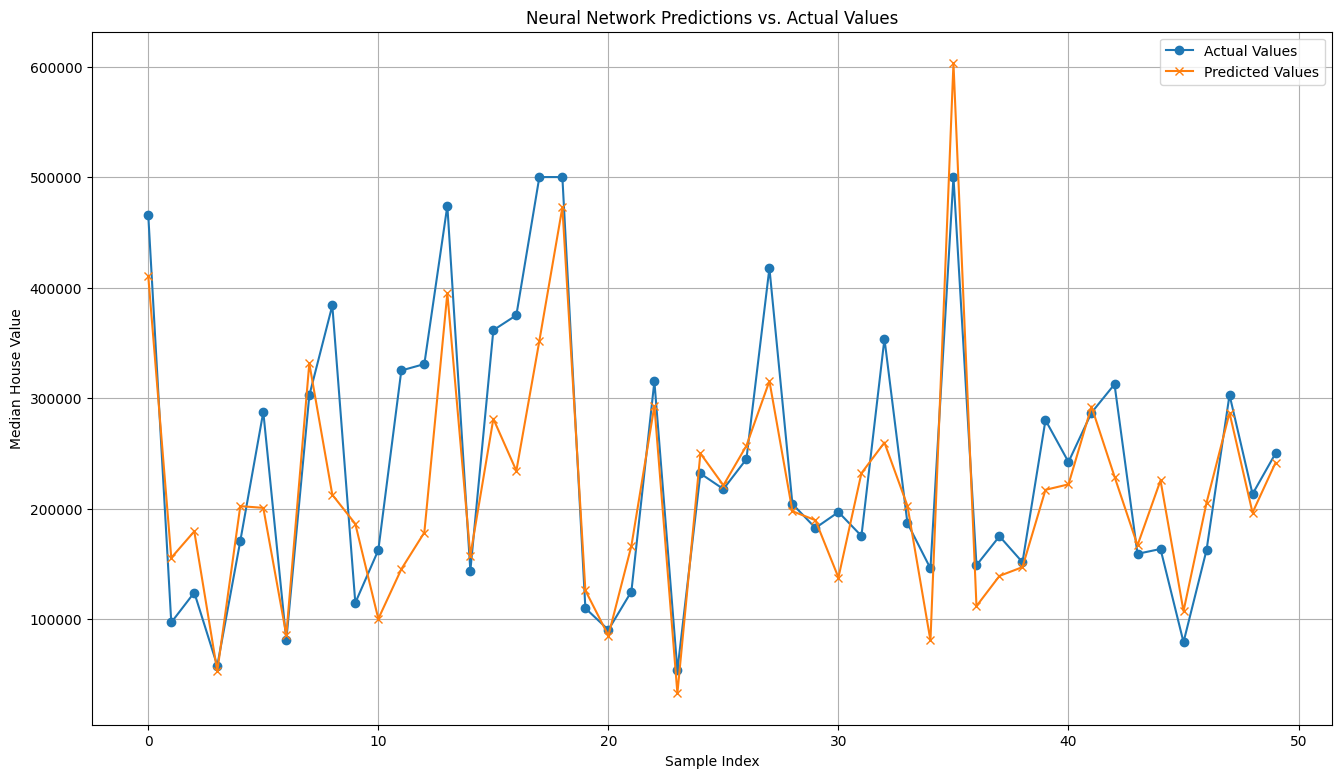

In [35]:
import numpy as np

# Random sample indices
sample_indices = np.random.choice(len(X_val), size=50, replace=False)

# Plot actual vs predicted for samples
plt.figure(figsize=(16, 9))
plt.plot(range(50), y_val.iloc[sample_indices], label='Actual Values', marker='o')
plt.plot(range(50), y_val_pred[sample_indices], label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.title('Neural Network Predictions vs. Actual Values')
plt.legend()
plt.grid(True)